### 使用的数据集是“良/恶性乳腺癌肿瘤预测”
##### 数据地址 https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

### 数据预处理

In [1]:
import pandas as pd
import numpy as np

In [2]:
#查看数据描述，发现的数据有11个特征属性，分别为样本编号、肿块厚度、细胞大小、细胞形状、边际粘连、
#单个上皮细胞大小、细胞核大小、染色体、正常细胞核、有丝分裂、类别
column_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
                'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

### read_csv从互联网读取数据

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',names=column_names)

In [4]:
#使用DataFrame上的info方法，查看数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [12]:
df.head(100)

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0              1000025                5                        1   
1              1002945                5                        4   
2              1015425                3                        1   
3              1016277                6                        8   
4              1017023                4                        1   
5              1017122                8                       10   
6              1018099                1                        1   
7              1018561                2                        1   
8              1033078                2                        1   
9              1033078                4                        2   
10             1035283                1                        1   
11             1036172                2                        1   
12             1041801                5                        3   
13             1043999                1                        1   
14             1044572                8                        7   
15             1047630                7                        4   
16             1048672                4                        1   
17             1049815                4                        1   
18             1050670               10                        7   
19             1050718                6                        1   
20             1054590                7                        3   
21             1054593               10                        5   
22             1056784                3                        1   
23             1057013                8                        4   
24             1059552                1                        1   
25             1065726                5                        2   
26             1066373                3                        2   
27             1066979                5                        1   
28             1067444                2                        1   
29             1070935                1                        1   
..                 ...              ...                      ...   
70             1121919                5                        1   
71             1123061                6                       10   
72             1124651                1                        3   
73             1125035                9                        4   
74             1126417               10                        6   
75             1131294                1                        1   
76             1132347                1                        1   
77             1133041                5                        3   
78             1133136                3                        1   
79             1136142                2                        1   
80             1137156                2                        2   
81             1143978                4                        1   
82             1143978                5                        2   
83             1147044                3                        1   
84             1147699                3                        5   
85             1147748                5                       10   
86             1148278                3                        3   
87             1148873                3                        6   
88             1152331                4                        1   
89             1155546                2                        1   
90             1156272                1                        1   
91             1156948                3                        1   
92             1157734                4                        1   
93             1158247                1                        1   
94             1160476                2                        1   
95             1164066                1                        1   
96             1165297                2                     

In [5]:
# 发现虽然没有nan的数据，但是看到有？的数据。把？的数据替换为标准缺失值表示nan
df = df.replace(to_replace="?",value=np.nan)

In [6]:
df.head(100)

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0              1000025                5                        1   
1              1002945                5                        4   
2              1015425                3                        1   
3              1016277                6                        8   
4              1017023                4                        1   
5              1017122                8                       10   
6              1018099                1                        1   
7              1018561                2                        1   
8              1033078                2                        1   
9              1033078                4                        2   
10             1035283                1                        1   
11             1036172                2                        1   
12             1041801                5                        3   
13             1043999                1                        1   
14             1044572                8                        7   
15             1047630                7                        4   
16             1048672                4                        1   
17             1049815                4                        1   
18             1050670               10                        7   
19             1050718                6                        1   
20             1054590                7                        3   
21             1054593               10                        5   
22             1056784                3                        1   
23             1057013                8                        4   
24             1059552                1                        1   
25             1065726                5                        2   
26             1066373                3                        2   
27             1066979                5                        1   
28             1067444                2                        1   
29             1070935                1                        1   
..                 ...              ...                      ...   
70             1121919                5                        1   
71             1123061                6                       10   
72             1124651                1                        3   
73             1125035                9                        4   
74             1126417               10                        6   
75             1131294                1                        1   
76             1132347                1                        1   
77             1133041                5                        3   
78             1133136                3                        1   
79             1136142                2                        1   
80             1137156                2                        2   
81             1143978                4                        1   
82             1143978                5                        2   
83             1147044                3                        1   
84             1147699                3                        5   
85             1147748                5                       10   
86             1148278                3                        3   
87             1148873                3                        6   
88             1152331                4                        1   
89             1155546                2                        1   
90             1156272                1                        1   
91             1156948                3                        1   
92             1157734                4                        1   
93             1158247                1                        1   
94             1160476                2                        1   
95             1164066                1                        1   
96             1165297                2                     

In [8]:
#在此查看DataFrame信息，发现Bare Nuclei这个属性只有683个，有16个是NaN的，占比为2.2%，直接丢弃
#或者用中位数、平均值替换NaN的值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [9]:
#丢掉数据，策略是一行中只要有一个位nan就丢弃整行，还有一种策略是设置为all，整行都为nan才丢弃
df.dropna(how='any',inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [11]:
df.shape

(683, 11)

### 数据异常值处理好了之后，使用sklearn.cross_validation里面的train_test_split方法分割数据，25%数据用于测试，75%用于训练

In [12]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[column_names[1:10]],df[column_names[10]],test_size=0.25,random_state = 123)

D:\softwares\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
#查看训练集的类别分布情况
y_train.value_counts()

2    336
4    176
Name: Class, dtype: int64

In [14]:
#查看测试集的类别分布情况
y_test.value_counts()

2    108
4     63
Name: Class, dtype: int64

In [16]:
### 接下来使用逻辑回归训练算法和预测
from sklearn.linear_model import LogisticRegression
#由于数据各个维度的标量是不一致的，需要先做归一化处理,标准化数据，使得特征数据方差为1，均值为0，
#使得预测的结果不会被某些维度过大的特征值所影响
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
#初始化逻辑回归
lr = LogisticRegression()
#喂数据，训练模型
lr.fit(x_train,y_train)
#预测模型
lr_predict = lr.predict(x_test)
lr_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4,
       2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 2, 2, 4, 4, 4, 4], dtype=int64)

### 如何度量算法的性能呢？有一个指标叫准确率Accuary，当然我们往往关注的是算法在某一方面的性能
### 因此引入了其他的一些性能度量的手段，在二分类任务里面预测结果和分类直接存在四种不同的组合结果，
### 构成一个混淆矩阵，由混淆矩阵可以计算出召回率和精准度
### 当然召回率和精准度可以使用调和平均数求得f1指标 f1 = 2/(1/precision+1/recall),它不仅拥有平均的功能，
### 还倾向于为召回率和精准度接近的模型给予更高的分数

In [19]:
## 使用线性分类模型对预测任务做性能分析
from sklearn.metrics import classification_report
print("准确率：",lr.score(x_test,y_test))
#使用classification_report方法得到其他的三个性能指标
print("LogisticRegression Index:\n",classification_report(y_test,lr_predict))
#得到某几个特征的准确率，可以加入target_names
print("LogisticRegression Index:\n",classification_report(y_test,lr_predict,target_names=['Marginal Adhesion','Mitoses']))

准确率： 0.982456140351
LogisticRegression Index:
              precision    recall  f1-score   support

          2       1.00      0.97      0.99       108
          4       0.95      1.00      0.98        63

avg / total       0.98      0.98      0.98       171

LogisticRegression Index:
                    precision    recall  f1-score   support

Marginal Adhesion       1.00      0.97      0.99       108
          Mitoses       0.95      1.00      0.98        63

      avg / total       0.98      0.98      0.98       171



### 接下来我们再使用另一种分类算法SGDClassifier来进行分类，SGDClassifier使用的是随机梯度下降的方式来分类，而LogisticRegression使用的是精确计算的方式


In [20]:
from sklearn.linear_model import SGDClassifier
#初始化算法
sgd = SGDClassifier()
#喂入数据训练模型,使用默认的参数
sgd.fit(x_train,y_train)
sgd_predict = sgd.predict(x_test)

D:\softwares\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [21]:
#性能度量
print('sgd 准确度：',sgd.score(x_test,y_test))
#精确度、召回率、f1指标
print("sgd 性能参数：\n",classification_report(y_test,sgd_predict))
print("sgd 性能参数：\n",classification_report(y_test,sgd_predict,target_names=['Marginal Adhesion','Mitoses']))

sgd 准确度： 0.976608187135
sgd 性能参数：
              precision    recall  f1-score   support

          2       0.99      0.97      0.98       108
          4       0.95      0.98      0.97        63

avg / total       0.98      0.98      0.98       171

sgd 性能参数：
                    precision    recall  f1-score   support

Marginal Adhesion       0.99      0.97      0.98       108
          Mitoses       0.95      0.98      0.97        63

      avg / total       0.98      0.98      0.98       171



### 对比LogisticRegression分类算法和SGDClassifier两种算法，发现逻辑回归性能较高，因为它采用的是精确解析的方式，计算时间长但精确度较高；后者采用随机梯度下降算法估计模型参数，计算时间端，性能低。一般而言10万以上的数据，建议采用SGDClassifier方法来分类

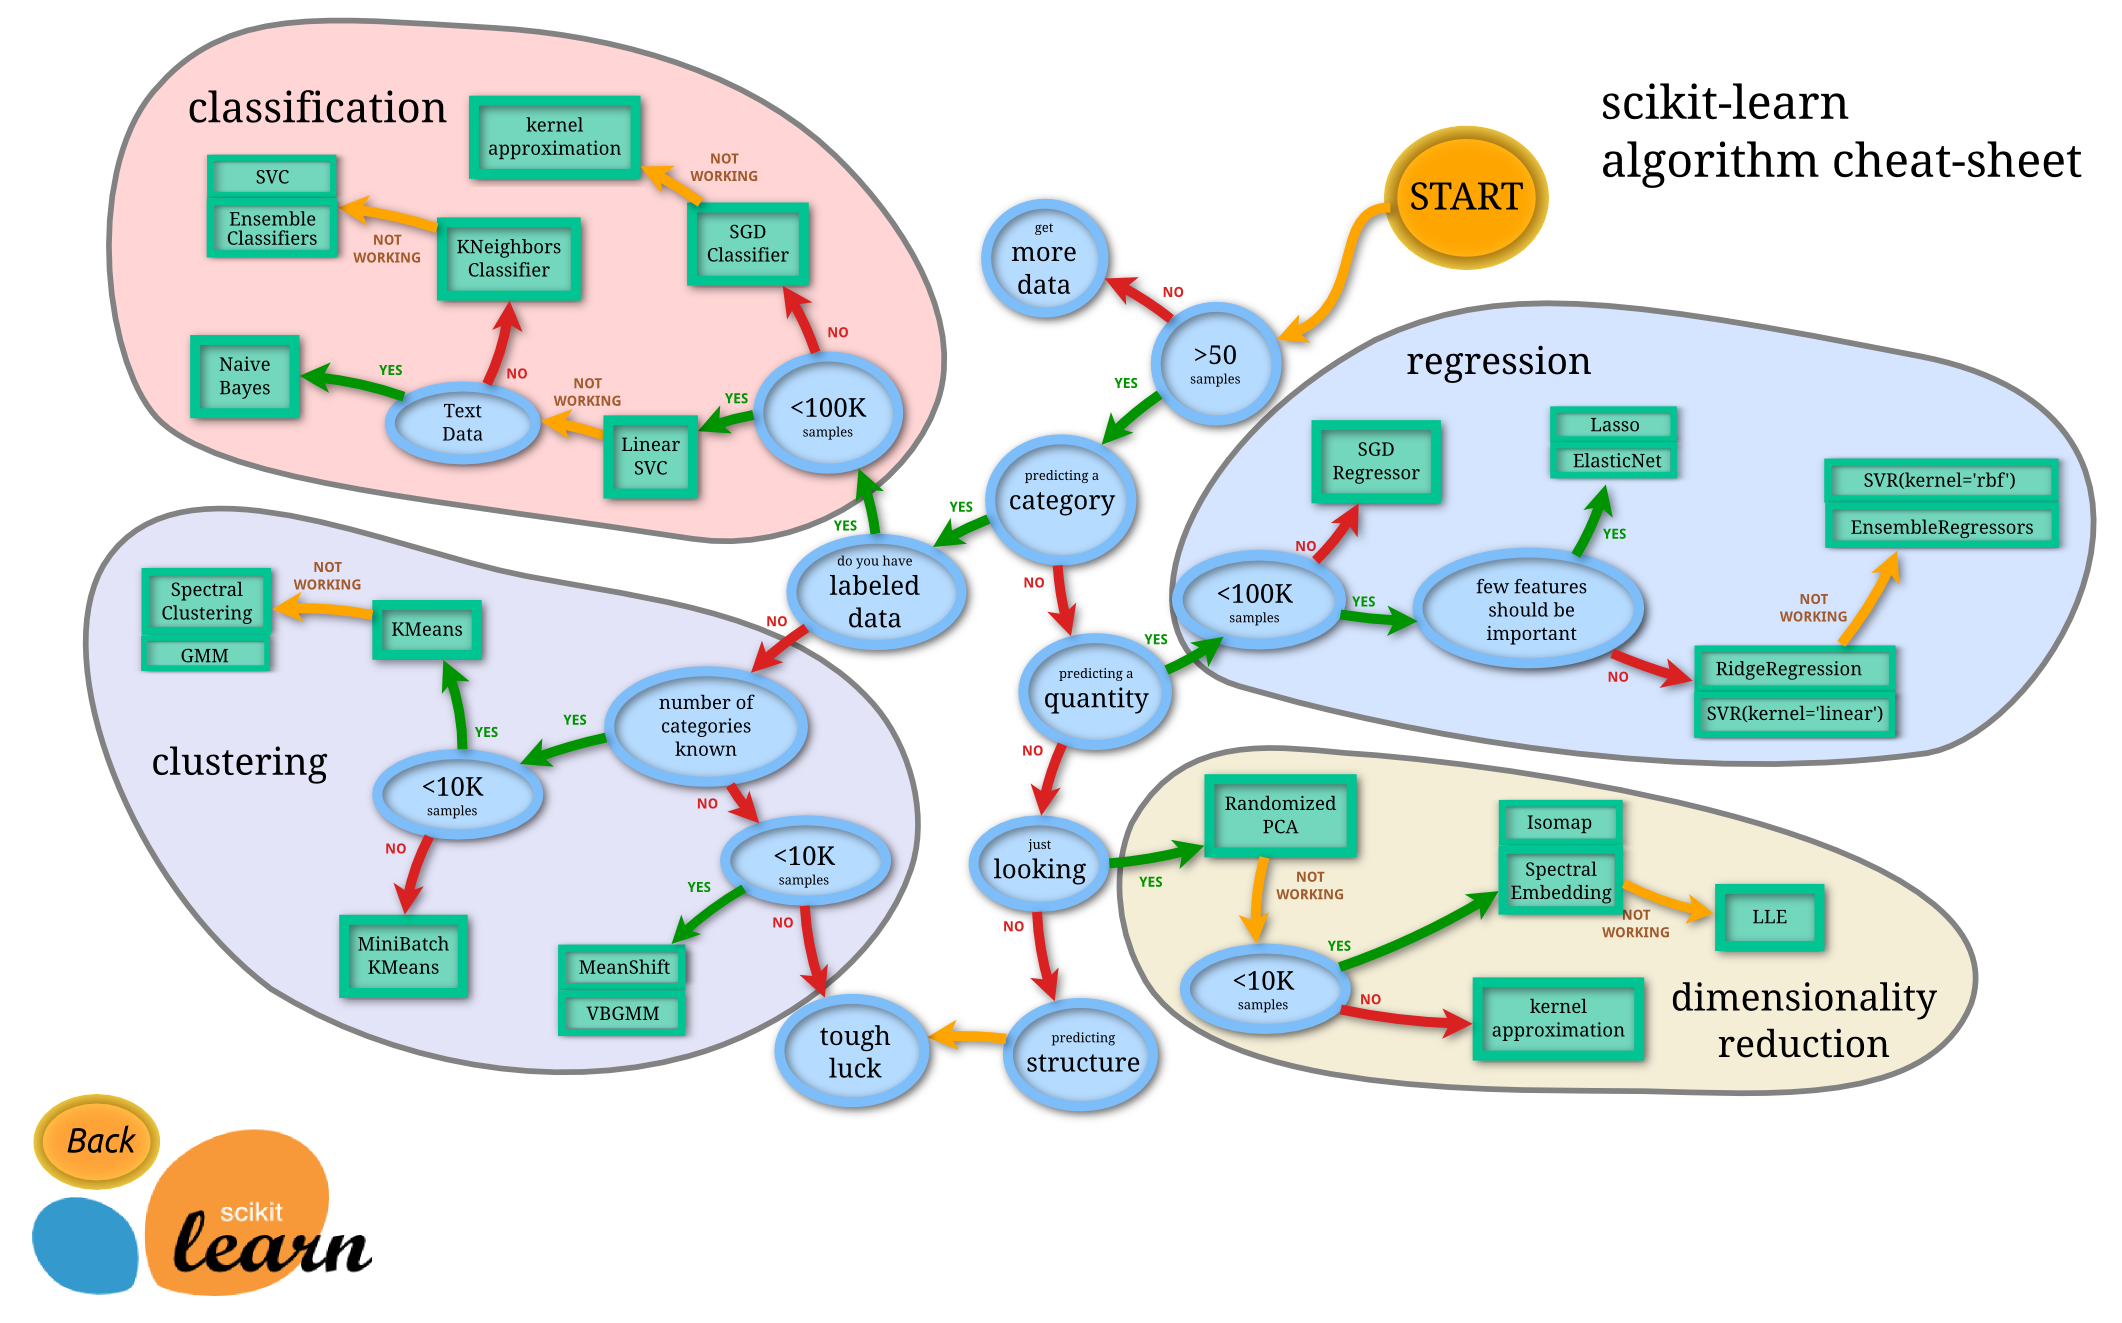

In [55]:
from IPython.display import Image
Image("ml.png")